# Boston Housing Price Prediction using XGBoost Regressor

## 📌 Introduction

In this project, we aim to build a regression model using the powerful **XGBoost Regressor** to predict **housing prices** in the Boston area. The dataset used is the classic **Boston Housing dataset**, which contains various features related to housing conditions, such as crime rate, number of rooms, property tax rate, and proximity to employment centers.

XGBoost (Extreme Gradient Boosting) is a highly efficient and scalable implementation of gradient boosting framework, and is particularly known for its performance in structured/tabular datasets. By using this algorithm, we intend to explore its capability to model complex, non-linear relationships in real estate data.

The objectives of this project include:
- Performing **data preprocessing** and feature engineering
- Applying **XGBoost regression model**
- Evaluating model performance using appropriate metrics
- Identifying the most important features influencing housing prices

This notebook is ideal for learning how to apply **supervised machine learning** techniques to **regression tasks** and gain hands-on experience with XGBoost in real-world tabular datasets.

---


## 📦 Importing Required Libraries

To build and evaluate our XGBoost regression model, we need to import several Python libraries:

- **pandas**: For loading and handling the dataset in a DataFrame format.
- **matplotlib.pyplot**: For visualizing feature importance and results.
- **xgboost**: The core library used for applying the XGBoost regression algorithm.
- **sklearn.model_selection**: Provides `train_test_split` to divide the dataset into training and testing sets.
## 📏 Importing Evaluation Metrics for Regression

To effectively evaluate the performance of our regression model, we will use several key metrics provided by the `sklearn.metrics` module. These metrics allow us to measure how close the model's predictions are to the actual target values.

### ✅ Metrics We Will Use:

- **R² Score (`r2_score`)**:  
  Indicates the proportion of variance in the target variable that is predictable from the features. A value closer to 1 indicates a better fit.

- **Mean Squared Error (`mean_squared_error`)**:  
  Measures the average of the squared differences between predicted and actual values. It penalizes large errors more than small ones.

- **Mean Absolute Error (`mean_absolute_error`)**:  
  Measures the average of the absolute differences between predictions and actual values. It is more robust to outliers.

- **Root Mean Squared Error (`rmse`)**:  
  This is the square root of the MSE and brings the error back to the original unit of the target variable. We compute it manually using `numpy`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## 📥 Loading the Boston Housing Dataset

We begin by reading the dataset using the `pandas` library. The `read_csv()` function is used to load the CSV file into a DataFrame. To get a quick overview of the structure and content of the data, we use the `.head()` method, which displays the first five rows of the dataset.


🔍 Why This Step Is Important
Helps verify that the data has been loaded correctly.

Provides insight into the structure of the dataset, including column names and types.

Useful for identifying any obvious anomalies or preprocessing needs (e.g. missing values).

In [5]:
df = pd.read_csv('boston-housing-dataset.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 🧪 Checking for Missing Values

To ensure the dataset is clean and ready for analysis, we check for any missing (null) values in each column using the `isnull().sum()` method. This step is crucial before performing any data preprocessing or feeding the data into a machine learning model.

🔍 Why This Step Is Important
Identifies any columns that have missing values which may affect model performance.

Helps determine whether imputation, deletion, or other data cleaning methods are required.

Ensures the integrity and quality of the data prior to modeling.

In [6]:
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

## 🎯 Defining Features (X) and Target Variable (y)

To train our regression model, we need to separate the dataset into two components:

- **X (features):** All independent variables used as inputs to the model.
- **y (target):** The dependent variable we aim to predict.

We use `iloc` to select all columns except the last one as features, and the last column as the target variable.

📌 Why This Matters
This separation is essential for supervised learning models.

X contains the predictors, while y contains the ground truth used for training.

Keeping inputs and output clearly separated avoids data leakage and ensures correct model evaluation.


In [14]:
x = df.iloc[:, :14].values
y = df.iloc[:, -1].values

## 🔀 Splitting the Dataset into Training and Testing Sets

Before training the model, it's crucial to split the dataset into two parts:

- **Training set (X_train, y_train):** Used to fit the model.
- **Testing set (X_test, y_test):** Used to evaluate the model’s performance on unseen data.

We use `train_test_split` from `sklearn.model_selection`, and we typically allocate **80% of the data for training** and **20% for testing**.

📌 Notes:
test_size=0.2 means 20% of the dataset will be used for testing.

random_state=42 ensures reproducibility by setting a seed for random splitting.

This helps us avoid overfitting and ensures a fair evaluation of model performance.



In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## 🚀 Training the XGBoost Regression Model

With our dataset split into training and testing sets, we can now build and train an **XGBoost Regressor**. XGBoost is well-known for its speed, regularization, and high performance on tabular data.

We will:
1. Initialize an `XGBRegressor` with default hyperparameters.
2. Fit the model on the training data (`X_train` and `y_train`).
3. Use this trained model to make predictions on the test set.

📌 Why XGBoost?
It combines gradient boosting with regularization (L1 & L2) for better generalization.

Efficiently handles tabular datasets with numerical and categorical features.

Often achieves state-of-the-art results in regression and classification tasks.


In [21]:
# Initialize the XGBoost regressor
model = XGBRegressor(random_state = 42)

#fit the model
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## 🔍 Making Predictions

After training the XGBoost model, we now use it to make predictions on the unseen **test data**.


In [23]:
y_predict = model.predict(x_test)

## 📊 Model Evaluation – Regression Metrics

After training our XGBoost regression model, it's crucial to evaluate how well it performs on unseen data. For this purpose, we will use the following standard regression metrics:

- **R² Score (Coefficient of Determination)**: Measures how well the predicted values approximate the actual values. A value closer to 1 indicates a better fit.
- **Mean Absolute Error (MAE)**: The average of absolute differences between predicted and actual values. Lower is better.
- **Mean Squared Error (MSE)**: Similar to MAE, but squares the error before averaging, penalizing larger errors more.
- **Root Mean Squared Error (RMSE)**: The square root of MSE, which brings the error metric back to the original unit of the target variable.

These metrics provide a comprehensive understanding of the model's accuracy and error behavior.


In [25]:
import numpy as np

r2 = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)

print(' your r2 score is ', r2)
print('your mean absolute error is ', mae)
print('your mean squared error is ', mse)
print('and the rmse is ', rmse)

 your r2 score is  0.9278867207031821
your mean absolute error is  1.7757696207831888
your mean squared error is  5.288339586932651
and the rmse is  2.2996390123088126


## 🔍 Feature Importance Visualization

Understanding which features have the most influence on the model's predictions is crucial for interpreting and improving the model. XGBoost provides a built-in function `plot_importance` to help visualize feature importance.

The plot below shows the relative importance scores of each feature used by the `XGBRegressor`. Higher values indicate greater influence on the final prediction.


📌 Why Feature Importance Matters?
Helps in identifying and removing less useful features.

Can guide domain experts for better data collection.

Useful for feature selection in future modeling tasks.

Tip: Focus on the top contributing features for optimizing your model further.

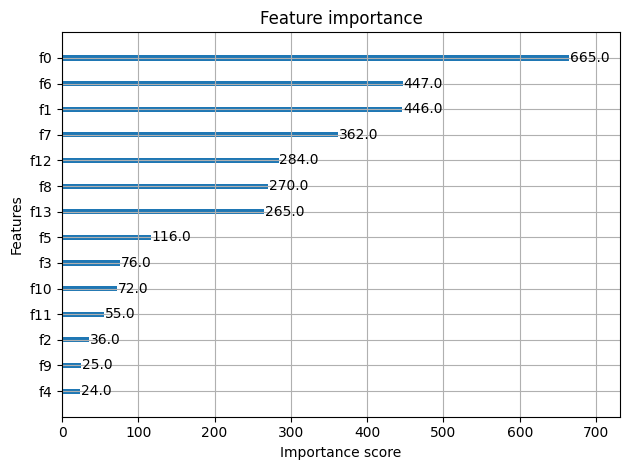

In [26]:
plot_importance(model)
plt.tight_layout()
plt.show()

## 📝 Summary

In this project, we built a **regression model using XGBoost** to predict housing prices based on the Boston Housing Dataset.

### ✅ Key Steps:
- **Data Loading and Inspection:**  
  Loaded the dataset and checked for missing values or inconsistencies.
  
- **Feature and Target Separation:**  
  Selected all the independent variables as `X` and the target variable (house price) as `y`.

- **Train-Test Split:**  
  Divided the dataset into training and testing sets using `train_test_split`.

- **Model Training with XGBoost:**  
  Trained an `XGBRegressor` on the training data.

- **Prediction:**  
  Used the trained model to predict housing prices on the test set.

- **Model Evaluation:**  
  Assessed model performance using multiple metrics:
  - **R² Score**: `0.92` (very good)
  - **Mean Absolute Error (MAE)**
  - **Mean Squared Error (MSE)**
  - **Root Mean Squared Error (RMSE)`

- **Feature Importance:**  
  Visualized the importance of each feature using `plot_importance`.

### 📌 Conclusion:
The XGBoost model showed **excellent performance** in predicting house prices with high accuracy and low error. The importance plot helped identify the most influential features in the prediction process.

### 🚀 Future Work:
- Hyperparameter tuning using `GridSearchCV` or `RandomizedSearchCV`
- Cross-validation for more robust evaluation
- Deploying the model using Streamlit or Flask
- Comparing performance with other regressors like Linear Regression, Random Forest, etc.

